In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
data = pd.read_csv(r'C:\Users\HP\Desktop\DS Project\netflix_titles_nov_2019.csv')

In [4]:
data.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [5]:
data.shape

(5837, 12)

In [6]:
data['season_count']=data.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "" , axis = 1)
data['season_count'].head()

0    1
1     
2     
3     
4    2
Name: season_count, dtype: object

In [7]:
data.shape

(5837, 13)

In [8]:
data.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,season_count
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,1
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,2


In [9]:
group_data = data.type.value_counts()
group_data

Movie      3939
TV Show    1898
Name: type, dtype: int64

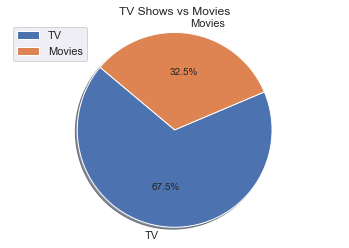

In [10]:
plt.pie(group_data, autopct='%1.1f%%',labels={'TV', 'Movies'}, shadow=True, startangle=140)
plt.axis('equal')
plt.title('TV Shows vs Movies')
plt.legend()
plt.show()

Almost 33% are TV shows, rest are movies.

# Penetration over the years

In [11]:
data["date_added"] = pd.to_datetime(data['date_added'])
data['year_added'] = data['date_added'].dt.year

In [12]:
data.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,season_count,year_added
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,1,2019.0
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,,2019.0
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,,2019.0
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,,2019.0
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaT,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,2,NaN


In [13]:
movies_per_year = []
tv_per_year = []

for i in range(2010, 2020):
    a = data.loc[(data['type']=='Movie') & (data.year_added==i)]
    b = data.loc[(data['type']=='TV Show') & (data.year_added==i)]
    movies_per_year.append(len(a))
    tv_per_year.append(len(b))

In [14]:
movies_per_year

[1, 13, 4, 6, 19, 58, 264, 913, 1290, 1367]

In [15]:
tv_per_year

[0, 0, 3, 3, 0, 16, 148, 271, 339, 476]

No handles with labels found to put in legend.


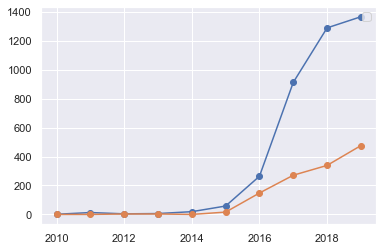

In [23]:
x=[i for i in range(2010,2020)]
y=movies_per_year
y1=tv_per_year
trace1 = plt.plot(x,y,marker='o')
trace2 = plt.plot(x,y1, marker='o')
plt.legend()

# data=[trace1,trace2]



1. Number of Movies that were added to Netflix platform in Year 2018 and 2019 combined were more than sum of all movies in All the previous years from 2008 to 2017

2. Number of Movies on Netflix were almost 4 times Than number of TV Shows in 2018 year alone.

3. Session from 2014 to 2015 was the time when the number of Movies on Netflix increased about 4 times.

# Countries with Most Content

In [25]:
top_countries = data.country.value_counts()
top_countries=top_countries[:15][::-1]
top_countries

Egypt               49
Thailand            50
Hong Kong           51
Taiwan              68
Australia           69
Turkey              78
Mexico              80
France              85
Spain              113
South Korea        133
Canada             139
Japan              168
United Kingdom     336
India              697
United States     1907
Name: country, dtype: int64

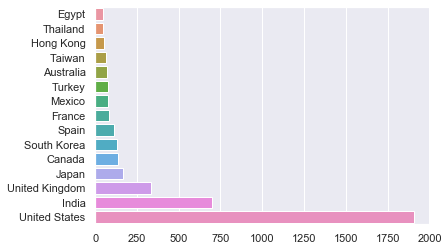

In [29]:
trace=sns.barplot(x=top_countries.values,y=top_countries[:15].index)